**Tiếng Việt** là một ngôn ngữ đặc biệt, có ngữ pháp phức tạp và có chút khác biệt (éo nhẹ) so với các hệ thống ngôn ngữ khác. Một từ của Tiếng Việt có thể được tạo hơn hai âm (tiếng), nếu bằng cách thông thường tách từ tiếng một thì các token có thể có nghĩa mới hoặc không có nghĩa. 

**Ví dụ:**
  * mong manh => (mong, manh): một cặp từ không có nghĩa 
  * nhân ngư => (nhân, ngư): mỗi token mang nghĩa hoàn toàn khác.
    
Do đó chúng ta cần có một phương pháp có thể nhận ra 1 nhiều hơn 2 tiếng là một token.   
 

### N-gram

Mô hình ngôn ngữ thống kê cho phép ước lượng xác xuất cho một chuỗi $m$ phần tử (ta sẽ mặc định là từ) $P(w_1w_2…w_m)$, tức là sự đoán 1 câu (chuỗi các từ) xuất hiện trong ngôn ngữ đó.

Ta có công thức Bayes:   $P(A,B) = P(B|A)\times P(A)$

Với:
* $P(A)$ Xác suất xảy ra sự kiện $A$
* $P(B)$ Xác suất xảy ra sự kiện $B$
* $P(B|A)$ Xác suất (có điều kiện) xảy ra sự kiện $B$ nếu biết rằng sự kiện 
$A$ đã xảy ra

Suy ra: $P(w_1w_2…w_m) = P(w_1) * P(w_2|w_1) * P(w_3|w_1w_2) *…* P(w_m|w_1w_2…w_{m-1})$

Trong thực tế, để lưu hết các trường hợp xảy ra của câu có độ dài nhỏ hơn m cần một dung lượng cực lớn, trong khi m không cố định và hoàn toàn có thể tiến tới vô cùng. Do vậy người ta sẽ sử dụng giả thuyết Markov để tính xác suất của một từ dựa vào nhiều nhát n từ xuất hiện trước đó, thông thường n = 1, 2, và 3. 

Công thức xấp xỉ markov bậc n:

$P(w_m|w_1w_2…w_{m-1}) = P(w_m|w_{m-n}w_{m-n+1}…w_{m-1})$

=> Công thức tính xác suất văn bản: $P(w_1w_2…w_m) = P(w_1) * P(w_2|w_1) * P(w_3|w_1w_2) *…* P(w_{m-1}|w_{m-n-1}w_{m-n} …w_{m-2})* P(w_m|w_{m-n}w_{m-n+1}…w_{m-1})$

**Mô hình N-gram**
* n = 1, unigram
* n = 2, bigram
* n = 3, trigram
    
**Ví dụ** Tính xác xuất của ***P(đèn| Một chiếc bóng đèn)***
* Mô hình unigram: Một từ mà không phụ thuộc từ đứng trước nó thì ko có ngữ cảnh: P = P(đèn)
* Mô hình bigram: Tính xác suất dựa vào một từ đứng trước nó: P = P(đèn|bóng)
* Mô hình trigram: Tính xác xuất dwuaj vào hai từ trước nó P = P(đèn|chiếc bóng)

Thông thường các mô hình bigram và trigram áp dụng tương đối nhiều cho các ngôn ngữ như Tiếng Việt, Tiếng Trung, Tiếng Nhật ...

    

### Bag of Words 

**Bag of Words (Bow):** nó như là một bộ từ vựng của tất cả các văn bản, đếm số lần xuất hiện của các từ vựng trong văn bản đó

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
'All my cats in a row cats',
'When my cat sits down, she looks like a Furby toy!',
'The cat from outer space',
'Sunshine loves to sit like this for some reason.'
]

vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense() )
print(vectorizer.vocabulary_ )

[[1 0 2 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0]]
{'all': 0, 'my': 11, 'cats': 2, 'in': 7, 'row': 14, 'when': 25, 'cat': 1, 'sits': 17, 'down': 3, 'she': 15, 'looks': 9, 'like': 8, 'furby': 6, 'toy': 24, 'the': 21, 'from': 5, 'outer': 12, 'space': 19, 'sunshine': 20, 'loves': 10, 'to': 23, 'sit': 16, 'this': 22, 'for': 4, 'some': 18, 'reason': 13}


#### Một số lưu ý trong Bag of words
* Trong thực tế, số lượng từ vựng của những ngôn ngữ rất nhiều, do đó từ điển sẽ cũng rất nhiền, việc tảo một vector đặc trưng cho từng câu cũng sẽ rất dài, bằng chiều dài của từ điển. 
* Có nhều từ sẽ rất hiểm gặp, những câu không có quá nhiều từ xuất hiện trong từ điển vẽ mang giá trị là 0, nếu > 50% chiều dài vector thì nó sẽ gây phản tác dụng.
* Không mang thứ tự. Ví dụ hai câu **Tôi trèo lên cây** và **Cây trèo lên tôi** là không như nhau về mặt ngữ nghĩa nhưng lại có chung giá trị vector khi sử dụng BoW

### TF-IDF (Term Frequency – Inverse Document Frequency)

**TF-IDF** là kỹ thuật đánh giá tầm quan trọng của một từ trong một văn bản, Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

In [16]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

print(uniqueWords)

{'for', 'out', 'a', 'children', 'walk', 'around', 'the', 'fire', 'went', 'sat', 'man'}


In [19]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
    
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1
    
print(numOfWordsB)

{'for': 0, 'out': 0, 'a': 0, 'children': 1, 'walk': 0, 'around': 1, 'the': 2, 'fire': 1, 'went': 0, 'sat': 1, 'man': 0}


In [20]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

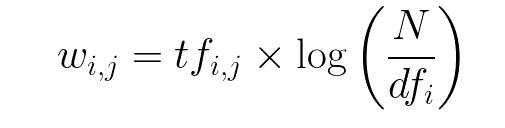

In [ ]:
- Chuyen anh mau (R, G, B) ve anh xam
- Anh / 255 => [0, 1] [0, 255] 
- 